## Step 1: Understand your data?

- Data format?
- Missing data?
- Outliers?

## Step 2: What is my aim?

- Discover drivers of Churn?
- Why do we care about the Churn?

## Step 3: What is my initial hypothesis (gut feel/domain knowlege/literature survey)

- Higher monthly charges leads to higher churn?
- Non-senior citizens churn at higher rate
- More the services, less the churn?

### Exploratory question?

- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [1]:
#Environment Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#import data
df = pd.read_csv('customer.csv')

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.2


### Step 1: Understand your data?
- Data format?
- Missing data?
- Outliers?

In [3]:
# Clean data (specifically NA or null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   float64
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   float64
 6   internet_service   7049 non-null   float64
 7   contract_type      7049 non-null   float64
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(7), object(6)
memory usage: 716.1+ KB


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   float64
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   float64
 6   internet_service   7038 non-null   float64
 7   contract_type      7038 non-null   float64
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(7), object(6)
memory usage: 769.8+ KB


In [5]:
# Update types to categorical data
df['phone_service'] = df.phone_service.replace([0,1,2], ['no_phone', 'one_line', 'two_p_phone'])
df['internet_service'] = df.internet_service.replace([0,1,2], ['No_internet', 'DSL', 'Fiber'])
df['contract_type'] = df.contract_type.replace([0,1,2],['Month_to_month', '1year', '2year'])
df['is_senior_citizen'] = df.is_senior_citizen.replace([0,1], ['No', 'Yes'])
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,267.40,Yes,3.2


In [6]:
df.internet_service.value_counts()

Fiber          3098
DSL            2417
No_internet    1523
Name: internet_service, dtype: int64

In [7]:
df.describe()

,monthly_charges,total_charges,tenure
count,7038.000000,7038.000000,7038.000000
mean,64.783475,2283.043883,32.430676
std,30.095424,2266.521984,24.580775
min,18.250000,18.800000,1.000000
25%,35.512500,401.587500,8.800000
50%,70.350000,1397.100000,28.800000
75%,89.887500,3793.775000,55.300000
max,118.750000,8684.800000,79.300000


In [8]:
# what datatype is your garget variable? Church = categorical
# Numerica continuous variables: monthly_charges, total_charges, tenure
# catigorical variables: gender, is_senior, partner, dependents, types...

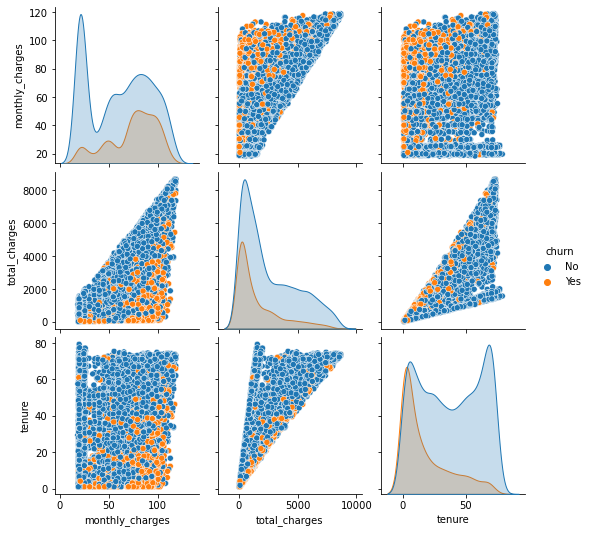

In [9]:
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [10]:
# mean monthly charges for customers who churn vs who don't churn?

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,267.40,Yes,3.2


In [11]:
df.groupby('churn').monthly_charges.mean()

churn
No     61.297359
Yes    74.417834
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

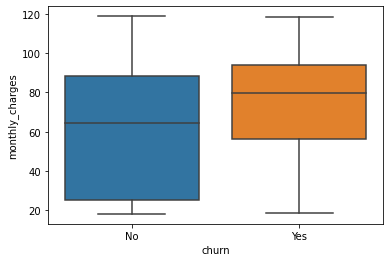

In [12]:
sns.boxplot(data = df, y ='monthly_charges', x ='churn')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

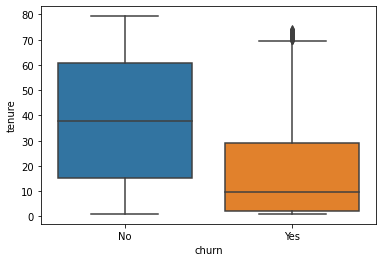

In [13]:
sns.boxplot(data = df, y = 'tenure', x = 'churn')

In [14]:
# categorical vs categorical

pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


In [15]:
pd.crosstab(df.dependents, df.contract_type, margins = True)

contract_type,1year,2year,Month_to_month,All
dependents,,,,
No,943,905,3086,4934
Yes,532,782,790,2104
All,1475,1687,3876,7038


In [16]:
pd.crosstab(df.dependents, df.contract_type, normalize = 'index')

contract_type,1year,2year,Month_to_month
dependents,,,
No,0.191123,0.183421,0.625456
Yes,0.252852,0.371673,0.375475


In [17]:
ctab_cont_type= pd.crosstab(df.contract_type, df.churn, normalize='index')

<AxesSubplot:ylabel='contract_type'>

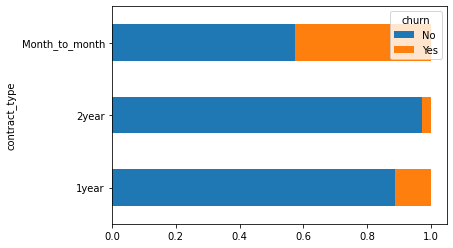

In [18]:
ctab_cont_type.plot(kind = 'barh', stacked = True)

In [19]:
pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')

churn,No,Yes
is_senior_citizen,,
No,0.763569,0.236431
Yes,0.583187,0.416813


In [20]:
pd.crosstab(df.is_senior_citizen, df.churn)

churn,No,Yes
is_senior_citizen,,
No,4502,1394
Yes,666,476


In [21]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,267.40,Yes,3.2


In [22]:
df.groupby('phone_service').sum()

,monthly_charges,total_charges,tenure
phone_service,,,
no_phone,28585.4,1020325.45,21643.1
one_line,183815.2,4581048.55,82032.1
two_p_phone,243545.5,10466688.85,124571.9


In [40]:
def services(df):
    if df.phone_service != "no_phone"
    and df.internet_service != "no_internet":
        return "both"
    elif df.phone_service != "no_phone":
        return "internet_only"
    elif df.internet_service != 'no_internet':
        return 'phone_only'

print services(df)

SyntaxError: invalid syntax (4020639440.py, line 2)

In [24]:
# Multiple Pairplots for insight

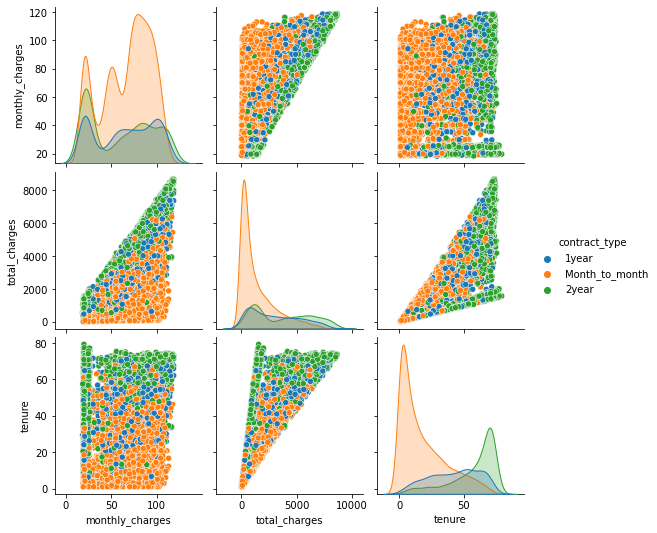

In [25]:
# Tenure Analysis and contract type for trends
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'contract_type']], hue = 'contract_type')

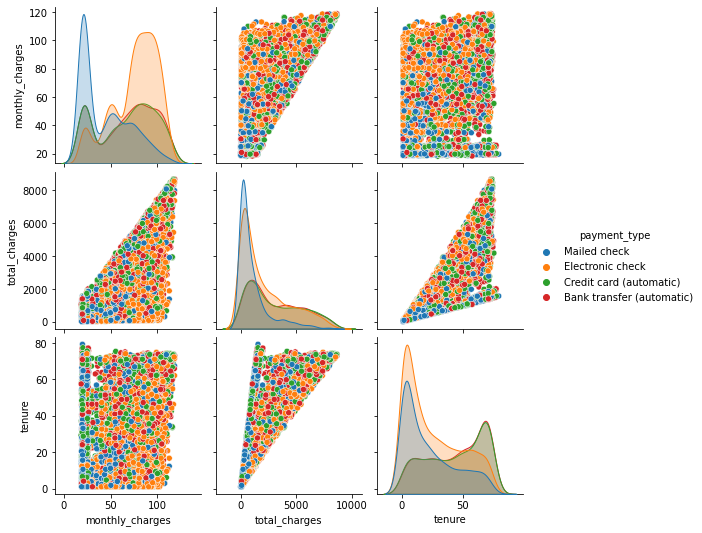

In [26]:
#Payment type & tenure Analysis for trends: no significant findings
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'payment_type']], hue = 'payment_type')

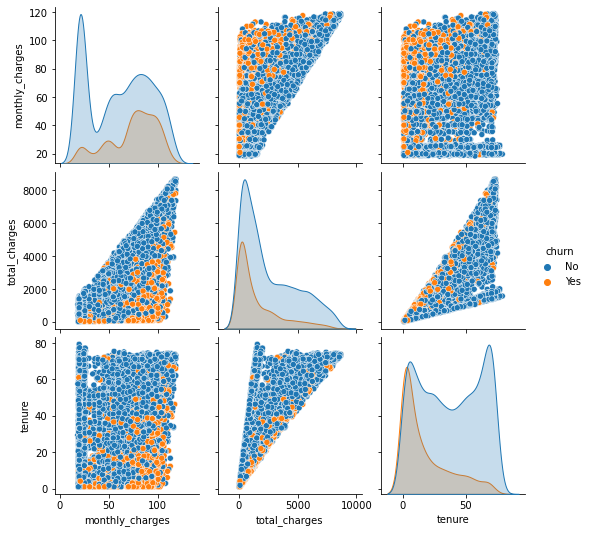

In [27]:
# Churn and Charges 
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

In [28]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,one_line,DSL,1year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,two_p_phone,DSL,Month_to_month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,one_line,Fiber,Month_to_month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,one_line,Fiber,Month_to_month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,one_line,Fiber,Month_to_month,Mailed check,83.9,267.40,Yes,3.2


<AxesSubplot:xlabel='churn', ylabel='tenure'>

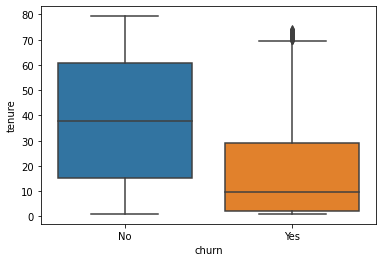

In [29]:
#churn rate vs tenure
sns.boxplot(data = df, y = 'tenure', x = 'churn')

### Exploratory question?
- How is churn differnt by service type?
- How is churn different by Contract type?
- How is churn different by payment type?

In [30]:
#Internet vs Churn
pd.crosstab(df.internet_service, df.churn, normalize = 'index')

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber,0.581343,0.418657
No_internet,0.925804,0.074196


<AxesSubplot:xlabel='internet_service'>

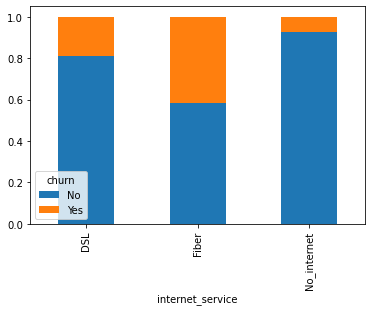

In [31]:
# Bar Plt
c_tab_is_c = pd.crosstab(df.internet_service, df.churn, normalize = 'index')
c_tab_is_c.plot(kind = 'bar', stacked = True)

In [32]:
#phone vs Churn
pd.crosstab(df.phone_service, df.churn, normalize = 'index')

churn,No,Yes
phone_service,,
no_phone,0.748899,0.251101
one_line,0.749558,0.250442
two_p_phone,0.713515,0.286485


<AxesSubplot:xlabel='phone_service'>

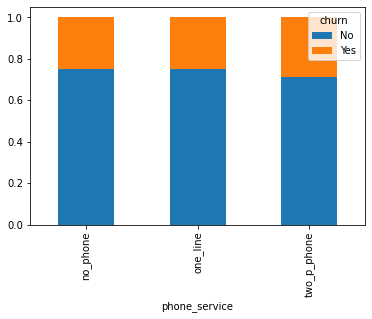

In [33]:
pc_c_tab = pd.crosstab(df.phone_service, df.churn, normalize = 'index')
pc_c_tab.plot(kind = 'bar', stacked = True)

In [34]:
#Payment Type info by gender : no significant findings
pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


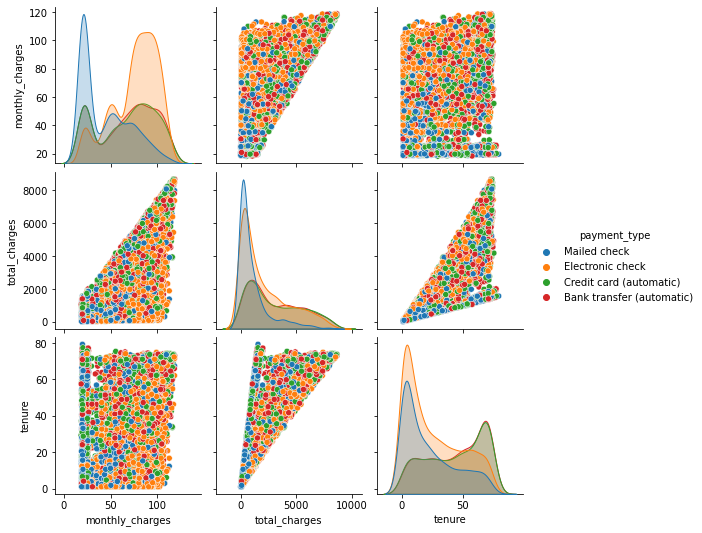

In [35]:
#Payment type and tenue: No significant findings
sns.pairplot(df[['monthly_charges', 'total_charges', 'tenure', 'payment_type']], hue = 'payment_type')